# A1: Data Curation Assignment
### Data 512: Human Centered Data Science

#### Aaliyah Hänni
#### 10/7/2021

## Project Overview
The goal of this assignment is to construct, analyze, and publish a dataset of monthly traffic on English Wikipedia from January 1 2008 through August 30 2021. Data about Wikipedia page traffic is accessed from two Wikimedia REST API endpoints and merged into a single dataset, where simple data processing is performed on the data, and then analyzed and visualized.

## Data Sources
In order to measure Wikipedia traffic from 2008-2021, data is collected from two different API endpoints, the Legacy Pagecounts API and the Pageviews API. For each API, data is collected for all months where data is available. The raw results are saved into 5 separate JSON source data files (one file per API query type).

### Wikipedia REST API
Terms of use: https://www.mediawiki.org/wiki/Wikimedia_REST_API#Terms_and_conditions

### Pagecounts API
The Legacy Pagecounts API provides access to desktop and mobile traffic data from December 2007 through July 2016.
Documentation: https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts

### Pageviews API
The Pageviews API provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month.
Pageviews API Documentation:https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews

## Data Acquisition

We begin the data acquisition process by requesting data from the Legacy Pagecoutns and Pageviews APIs. This is done by passing in the necessary parameters (outlined in the API documentation linked above), and calling each API. There are 5 API calls made, two for the Legacy Pagecounts (mobile and desktop) and three for the Pageviews (mobile app, mobile web, and desktop). 


The results of each API call are then stored in a variable and used to create a corresponding JSON file, with the following filename format: 

apiname_accesstype_firstmonth-lastmonth.json


In [1]:
import json
import requests

In [2]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [3]:
# Parameters for getting aggregated legacy view data 
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
params_legacy_mobile = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                # for end use 1st day of month following final month of data
                 "end" : "2016080100"
                    }

params_legacy_desktop = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                # for end use 1st day of month following final month of data
                 "end" : "2016080100"
                    }

# Parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
params_pageviews_mobile_app = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021090100'
                        }
params_pageviews_mobile_web = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021090100'
                        }
params_pageviews_desktop = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021090100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/aaliyahfiala42',
    'From': 'fialaa@uw.edu'
}

In [4]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [5]:
#Get monthly pages views for mobile from Legacy API
monthly_legacy_mobile = api_call(endpoint_legacy, params_legacy_mobile)

#Get monthly pages views for desktop from Legacy API
monthly_legacy_desktop = api_call(endpoint_legacy, params_legacy_desktop)

In [6]:
#print(monthly_legacy_mobile)
#print(monthly_legacy_desktop)

In [7]:
#Get monthly pages views for mobile apps from Pageviews API
monthly_pageviews_mobile_app = api_call(endpoint_pageviews, params_pageviews_mobile_app)

#Get monthly pages views for mobile web from Pageviews API
monthly_pageviews_mobile_web = api_call(endpoint_pageviews, params_pageviews_mobile_web)

#Get monthly pages views for desktop from Pageviews API
monthly_pageviews_desktop = api_call(endpoint_pageviews, params_pageviews_desktop)


In [8]:
#print(monthly_pageviews_mobile_app)
#print(monthly_pageviews_mobile_web)
#print(monthly_pageviews_desktop)

In [9]:
#Saving data from APIs to JSON files in the format apiname_accesstype_firstmonth-lastmonth.json

with open('legacy_mobile-site_200801-201607.json', 'w') as outfile:
    json.dump(monthly_legacy_mobile, outfile)
    
with open('legacy_desktop-site_200801-201607.json', 'w') as outfile:
    json.dump(monthly_legacy_desktop, outfile)

with open('pageviews_mobile-app_201507-202108.json', 'w') as outfile:
    json.dump(monthly_pageviews_mobile_app, outfile)

with open('pageviews_mobile-web_201507-202108.json', 'w') as outfile:
    json.dump(monthly_pageviews_mobile_web, outfile)
    
with open('pageviews_desktop_201507-202108.json', 'w') as outfile:
    json.dump(monthly_legacy_desktop, outfile)

## Data Processing


First we start by exporting each JSON file dataset and then formatting them to be stored as pandas dataframes. We convert the data into Python Dataframes using the Pandas library to allow for ease of processing and manipulation.

Next we combine the mobile web and mobile app tables from the Pageviews API to get a combined mobile view count. After that we extract the Year and Month from the datetime variable that the APIs returned (i.e ditching the days and hours). Lastly, all of the dataframes are combined to create a single dataframe and exported into a csv document labeled en-wikipedia_traffic_200712-202108.csv.

In [10]:
import pandas as pd

In [11]:
#reading in the Legacy Mobile JSON file
with open('legacy_mobile-site_200801-201607.json', 'r') as f:
    legacy_mobile = json.loads(f.read())
    
#flattening JSON to format into columns correctly
legacy_mobile = pd.json_normalize(legacy_mobile, record_path = ['items'])

#preview data to check that it all read in correctly
#legacy_mobile.head()



#reading in the Legacy Desktop JSON file
with open('legacy_desktop-site_200801-201607.json', 'r') as f:
    legacy_desktop = json.loads(f.read())
    
#flattening JSON to format into columns correctly
legacy_desktop = pd.json_normalize(legacy_desktop, record_path = ['items'])

#preview data to check that it all read in correctly
#legacy_desktop.head()



#reading in the Pageviews Mobile App JSON file
with open('pageviews_mobile-app_201507-202108.json', 'r') as f:
    pageviews_mobile_app = json.loads(f.read())
    
#flattening JSON to format into columns correctly
pageviews_mobile_app = pd.json_normalize(pageviews_mobile_app, record_path = ['items'])

#preview data to check that it all read in correctly
#pageviews_mobile_app.head()



#reading in the Pageviews Mobile Web JSON file
with open('pageviews_mobile-web_201507-202108.json', 'r') as f:
    pageviews_mobile_web = json.loads(f.read())
    
#flattening JSON to format into columns correctly
pageviews_mobile_web = pd.json_normalize(pageviews_mobile_web, record_path = ['items'])

#preview data to check that it all read in correctly
#pageviews_mobile_web.head()



#reading in the Pageviews Desktop JSON file
with open('pageviews_mobile-web_201507-202108.json', 'r') as f:
    pageviews_desktop = json.loads(f.read())
    
#flattening JSON to format into columns correctly
pageviews_desktop = pd.json_normalize(pageviews_desktop, record_path = ['items'])

#preview data to check that it all read in correctly
pageviews_desktop.head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-web,user,monthly,2015070100,3179131148
1,en.wikipedia,mobile-web,user,monthly,2015080100,3192663889
2,en.wikipedia,mobile-web,user,monthly,2015090100,3073981649
3,en.wikipedia,mobile-web,user,monthly,2015100100,3173975355
4,en.wikipedia,mobile-web,user,monthly,2015110100,3142247145


#### Combing Mobile Web and Mobile App
In the steps below, the monthly values for mobile-app and mobile-web from the PageViews API will be combined to obtain the total monthly mobile traffic count for each month. 

In [12]:
#replace all null count months with zeroes
pageviews_mobile_web['views'] = pageviews_mobile_web['views'].fillna(0)
pageviews_mobile_app['views'] = pageviews_mobile_app['views'].fillna(0)
pageviews_desktop['views'] = pageviews_desktop['views'].fillna(0)

legacy_mobile['count'] = legacy_mobile['count'].fillna(0)
legacy_desktop['count'] = legacy_desktop['count'].fillna(0)


In [13]:
#removing the following fields as they are not needed for further analysis: agent, granularity, project, and access
pageviews_mobile_web = pageviews_mobile_web.drop(['agent', 'granularity', 'project', 'access'], axis = 1)
pageviews_mobile_app = pageviews_mobile_app.drop(['agent', 'granularity', 'project', 'access'], axis = 1)

In [14]:
#merging Pageview Mobile Web and App dataframes 
pageviews_mobile = pd.merge(pageviews_mobile_web, pageviews_mobile_app, on='timestamp')

#creating a new field that is the sum of all mobile views
pageviews_mobile_sum = pageviews_mobile['views_x'] + pageviews_mobile['views_y']

#adding the new field back into the dataframe
pageviews_mobile = pd.concat([pageviews_mobile, pageviews_mobile_sum], axis = 1, names = ['views'])

#removing the individual web and app views
pageviews_mobile = pageviews_mobile.drop(['views_x', 'views_y'], axis = 1)

#relabing the summed column to views for clarity
#pageviews_mobile = pageviews_mobile.rename({'0' : 'views'}, axis = 1)

In [15]:
#pageviews_mobile

#### Time Formating
PageViews API returned the date in the format YYYYMMDDHH, and since we are only exploring the total views by month, we can extract the unnecesary days and hours from each row. We also seperate month and year to allow for better formating later on. All date timestamp variables modified to segregate the month (MM) and year (YYYY), discarding days and hours.

In [16]:
## Time stamp formating for Legacy Mobile
#getting the year (YYYY) from the timestamp (format = YYYYMMHHDD)
year = legacy_mobile['timestamp'].str.slice(0, 4)

#getting the month (MM) from the timestamp (format = YYYYMMHHDD)
month = legacy_mobile['timestamp'].str.slice(4, 6)

#removing the timestamp and appending the year and month as columns
legacy_mobile = legacy_mobile.drop(['timestamp', 'project', 'granularity', 'access-site'], axis = 1)
legacy_mobile = pd.concat([legacy_mobile, year, month], axis = 1)

#renaming columns to be more intuitive
legacy_mobile.columns = ['views', 'year', 'month']



## Time stamp formating for Legacy Desktop
#getting the year (YYYY) from the timestamp (format = YYYYMMHHDD)
year = legacy_desktop['timestamp'].str.slice(0, 4)

#getting the month (MM) from the timestamp (format = YYYYMMHHDD)
month = legacy_desktop['timestamp'].str.slice(4, 6)

#removing the timestamp and appending the year and month as columns
legacy_desktop = legacy_desktop.drop(['timestamp', 'project', 'granularity', 'access-site'], axis = 1)
legacy_desktop = pd.concat([legacy_desktop, year, month], axis = 1)

#renaming columns to be more intuitive
legacy_desktop.columns = ['views', 'year', 'month']



## Time stamp formating for Pageviews Mobile
#getting the year (YYYY) from the timestamp (format = YYYYMMHHDD)
year = pageviews_mobile['timestamp'].str.slice(0, 4)

#getting the month (MM) from the timestamp (format = YYYYMMHHDD)
month = pageviews_mobile['timestamp'].str.slice(4, 6)

#removing the timestamp and appending the year and month as columns
pageviews_mobile = pageviews_mobile.drop(['timestamp'], axis = 1)
pageviews_mobile = pd.concat([pageviews_mobile, year, month], axis = 1)

#renaming columns to be more intuitive
pageviews_mobile.columns = ['views', 'year', 'month']



## Time stamp formating for Pageviews Desktop
#getting the year (YYYY) from the timestamp (format = YYYYMMHHDD)
year = pageviews_desktop['timestamp'].str.slice(0, 4)

#getting the month (MM) from the timestamp (format = YYYYMMHHDD)
month = pageviews_desktop['timestamp'].str.slice(4, 6)

#removing the timestamp and appending the year and month as columns
pageviews_desktop = pageviews_desktop.drop(['timestamp', 'project', 'granularity', 'access', 'agent'], axis = 1)
pageviews_desktop = pd.concat([pageviews_desktop, year, month], axis = 1)

#renaming columns to be more intuitive
pageviews_desktop.columns = ['views', 'year', 'month']

In [17]:
#legacy_mobile.head()

In [18]:
#legacy_desktop.head()

In [19]:
#pageviews_mobile.head()

In [20]:
#pageviews_desktop.head()

#### Final Data Set
For ease of data analysis, all four about files will be combined and stored into a singe CSV file with the following headers (format): year (YYYY), month (MM), pagecount_all_views (int), pagecount_desktop_views (int), pagecount_mobile_views (int), pageview_all_views (int), pageview_desktop_views (int), pageview_mobile_views (int).



In [21]:
#merging all documents into one
pd.concat([legacy_mobile, legacy_desktop, pageviews_mobile, pageviews_desktop], axis = 1)

,views,year,month,views,year,month,views,year,month,views,year,month
0,3.091547e+09,2014,10,4930902570,2008,01,3.288755e+09,2015,07,3.179131e+09,2015,07
1,3.027490e+09,2014,11,4818393763,2008,02,3.302333e+09,2015,08,3.192664e+09,2015,08
2,3.278950e+09,2014,12,4955405809,2008,03,3.170203e+09,2015,09,3.073982e+09,2015,09
3,3.485302e+09,2015,01,5159162183,2008,04,3.268499e+09,2015,10,3.173975e+09,2015,10
4,3.091534e+09,2015,02,5584691092,2008,05,3.236601e+09,2015,11,3.142247e+09,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...
98,NaN,NaN,NaN,5407676056,2016,03,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,5572235399,2016,04,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,5330532334,2016,05,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,4975092447,2016,06,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#merge together legacy mobile & desktop data 
legacy_merged = pd.merge(legacy_desktop, legacy_mobile, how = 'outer', left_on = ['year', 'month'], right_on = ['year', 'month'])

#replace nulls with 0
legacy_merged['views_x'] = legacy_merged['views_x'].fillna(0)
legacy_merged['views_y'] = legacy_merged['views_y'].fillna(0)


#create total field for Legacy all (mobile & desktop)
legacy_total = legacy_merged['views_x'] + legacy_merged['views_y']

#add new field to complete legacy data
legacy_merged = pd.concat([legacy_merged, legacy_total], axis = 1)

#rename columns
legacy_merged.columns = ['pagecount_desktop_views', 'year', 'month', 'pagecount_mobile_views', 'pagecount_all_views']

In [23]:
#merge together legacy mobile & desktop data 
pageviews_merged = pd.merge(pageviews_desktop, pageviews_mobile, how = 'outer', left_on = ['year', 'month'], right_on = ['year', 'month'])

#replace nulls with 0
pageviews_merged['views_x'] = pageviews_merged['views_x'].fillna(0)
pageviews_merged['views_y'] = pageviews_merged['views_y'].fillna(0)


#create total field for Legacy all (mobile & desktop)
pageviews_total = pageviews_merged['views_x'] + pageviews_merged['views_y']

#add new field to complete legacy data
pageviews_merged = pd.concat([pageviews_merged, pageviews_total], axis = 1)

#rename columns
pageviews_merged.columns = ['pageview_desktop_views', 'year', 'month', 'pageview_mobile_views', 'pageview_all_views']

In [24]:
#pageviews_merged

In [25]:
#merging pageviews and pagecounts to get a single dataframe
all_wiki_views = pd.merge(pageviews_merged, legacy_merged, how = 'outer', left_on = ['year', 'month'], right_on = ['year', 'month'])
#all_wiki_views

In [26]:
#replacing all nulls with 0's
#all_wiki_views = all_wiki_views.fillna(0)


In [27]:
#creating a excel file of the final data set: 'en-wikipedia_traffic_200712-202108.csv'
all_wiki_views.to_csv('en-wikipedia_traffic_200712-202108.csv')


## Data Analysis


The goal of the analysis performed below is to create a visulization that quickly summarizes the number of views that Wikipedia recieves every month for the following metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop). 

The final visulization plots the total number of Wikipedia views by month and contains data from the both the Legacy Pagecounts and Pagviews APIs. All views are shown in blue, desktop views are shown in green, and mobile views are shown in orange. The Legacy Pagecount API is displayed in a lighter shade, to distinguish data from the 2 APIs, to allow for easy comparison. 

Note that there is some overlap between data visualized for the two APIs during the period of July 2015 - July 2016. The number of views between these overlapping dates are not equal and vary quite a bit, especially when looking at desktop views. One way to possible account for this discrepancy is that the data from the Pageview API excludes spiders/crawlers, while data from the Pagecounts API does not.


In [28]:
import matplotlib.pyplot as plt

In [29]:
#combining month and year for plot
all_wiki_views['date'] = all_wiki_views['month'].map(str)+ '-' + all_wiki_views['year'].map(str)
all_wiki_views['date'] = pd.to_datetime(all_wiki_views['date'], format='%m-%Y').dt.strftime('%m-%Y')

In [30]:
#sorting views by dates for visualization
all_wiki_views = all_wiki_views.sort_values(by = ['year', 'month'])

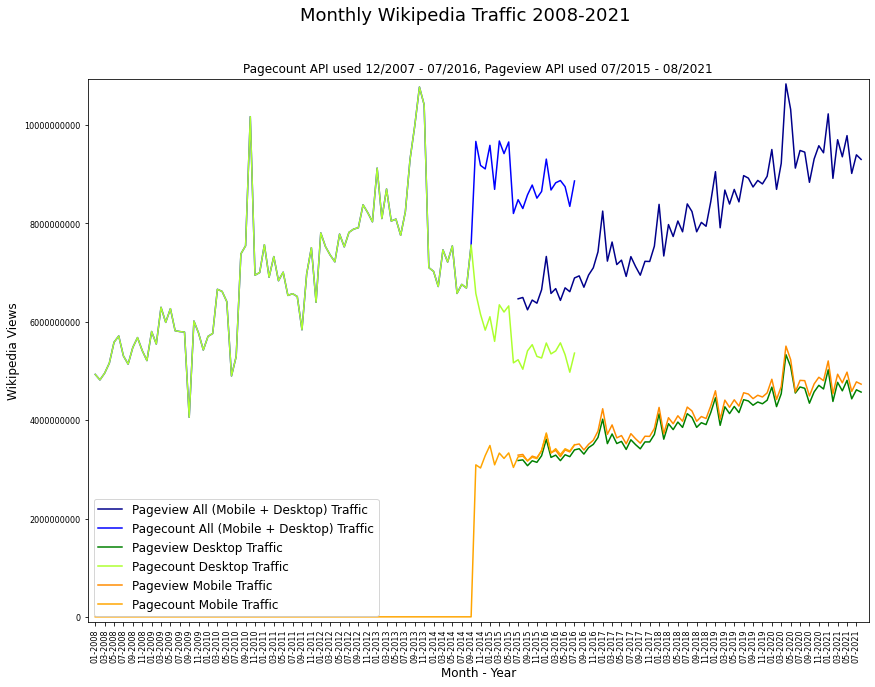

In [35]:
#creating visualization
plt.figure(figsize=(14, 10))

#change font sizes for better visibility
plt.rc('font', size=12)         
plt.rc('axes', titlesize=12)    
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=8)  
plt.rc('ytick', labelsize=8)
plt.rc('legend', fontsize=12) 
plt.rc('figure', titlesize=18) 

#plot each line
plt.plot(all_wiki_views['date'], all_wiki_views['pageview_all_views'], label = 'Pageview All (Mobile + Desktop) Traffic', linestyle = 'solid', color = 'darkblue')
plt.plot(all_wiki_views['date'], all_wiki_views['pagecount_all_views'], label = 'Pagecount All (Mobile + Desktop) Traffic', linestyle = 'solid', color = 'blue')

plt.plot(all_wiki_views['date'], all_wiki_views['pageview_desktop_views'], label = 'Pageview Desktop Traffic', linestyle = 'solid', color = 'green')
plt.plot(all_wiki_views['date'], all_wiki_views['pagecount_desktop_views'], label = 'Pagecount Desktop Traffic', linestyle = 'solid', color = 'greenyellow')

plt.plot(all_wiki_views['date'], all_wiki_views['pageview_mobile_views'], label = 'Pageview Mobile Traffic', linestyle = 'solid', color = 'darkorange')
plt.plot(all_wiki_views['date'], all_wiki_views['pagecount_mobile_views'], label = 'Pagecount Mobile Traffic', linestyle = 'solid', color = 'orange')

#give everything a label
plt.legend()
plt.suptitle('Monthly Wikipedia Traffic 2008-2021')
plt.title('Pagecount API used 12/2007 - 07/2016, Pageview API used 07/2015 - 08/2021')
plt.ylabel('Wikipedia Views')
plt.xlabel('Month - Year')

#format axises for better legibilty
plt.ticklabel_format(axis = 'y', style = 'plain') #remove scientific notation
plt.xticks(all_wiki_views['date'][::2],  rotation= 90) # rotate and display every other month label
plt.margins(0.01) #add margins

plt.show()

## Sources

https://towardsdatascience.com/how-to-parse-json-data-with-python-pandas-f84fbd0b1025 

https://www.codegrepper.com/code-examples/python/add+two+dataframes+pandas

https://www.codegrepper.com/code-examples/python/parse+string+in+pandas+dataframe

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html